In [2]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 889.1 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import tensorflow as tf
from tensorflow import keras

2025-08-08 11:58:53.385900: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Load the Dataset
df = pd.read_csv('/media/rizi/8A684C83684C6FCD/projects/end-to-end-malicious-url-detection/notebook/Dataset/malicious_phish.csv')
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [5]:
features = df.columns
print(features)

Index(['url', 'type'], dtype='object')


In [6]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


In [7]:
df['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

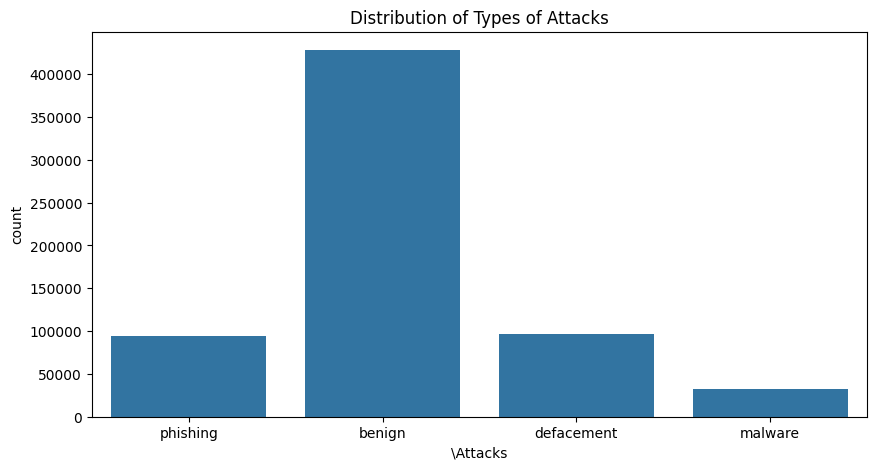

In [9]:
plt.figure(figsize= (10 , 5))
plt.title('Distribution of Types of Attacks')
sns.countplot(x = 'type', data = df)
# ax.bar_label(ax.containers[0])
plt.xlabel('\Attacks')
plt.savefig('/media/rizi/8A684C83684C6FCD/projects/end-to-end-malicious-url-detection/images/Distribution of Types of Attacks.png', bbox_inches='tight')

### WordCloud of Different Types of Attacks

In [10]:
df_phish = df[df['type'] == 'phishing']
df_benign = df[df['type'] == 'benign']
df_deface = df[df['type'] == 'defacement']
df_malware = df[df['type'] == 'malware']

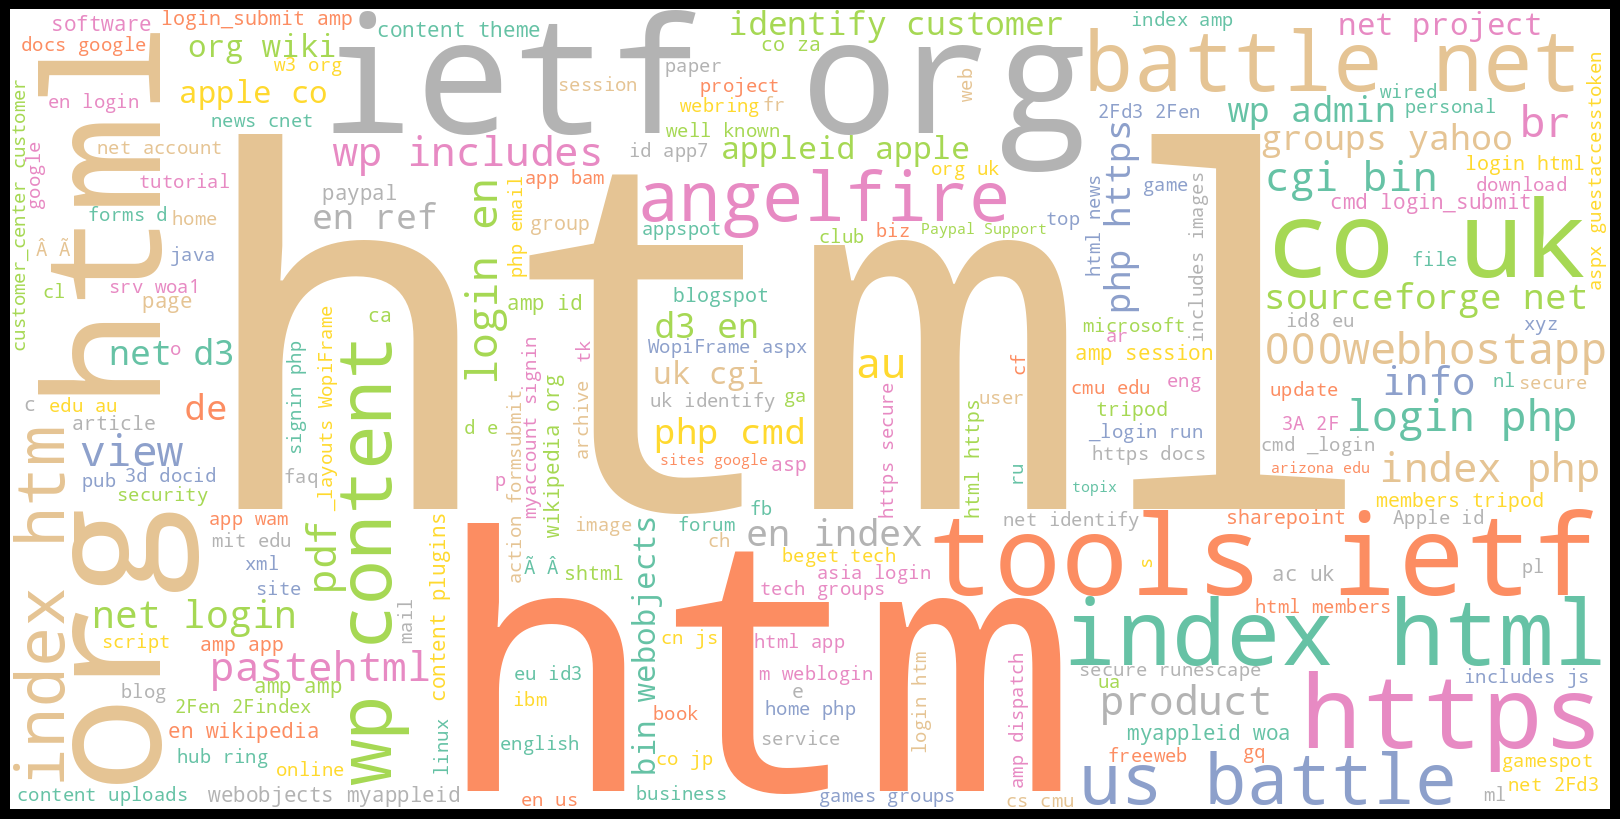

In [11]:
phish_url = " ".join(i for i in df_phish.url)
# print(phish_url[0: 1000])
wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color="white",  
    colormap="Set2", 
    
).generate(phish_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# plt.savefig('./Images/phish_wordcloud.png', bbox_inches='tight')

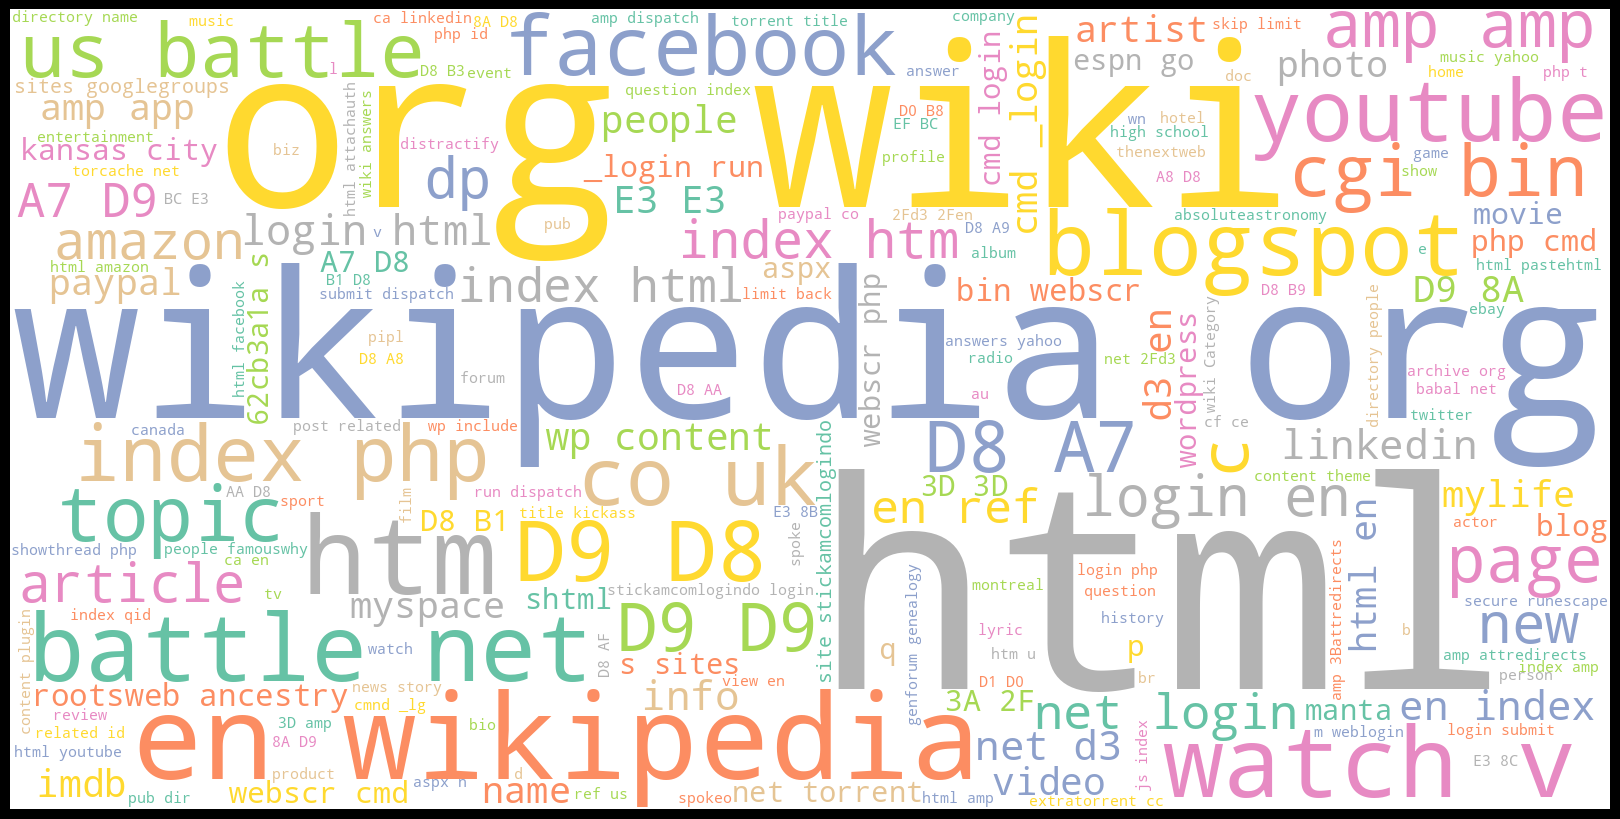

In [12]:
benign_url = " ".join(i for i in df_benign.url)

wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color="white",  
    colormap="Set2", 
    
).generate(benign_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# plt.savefig('./Images/benign_wordcloud.png')

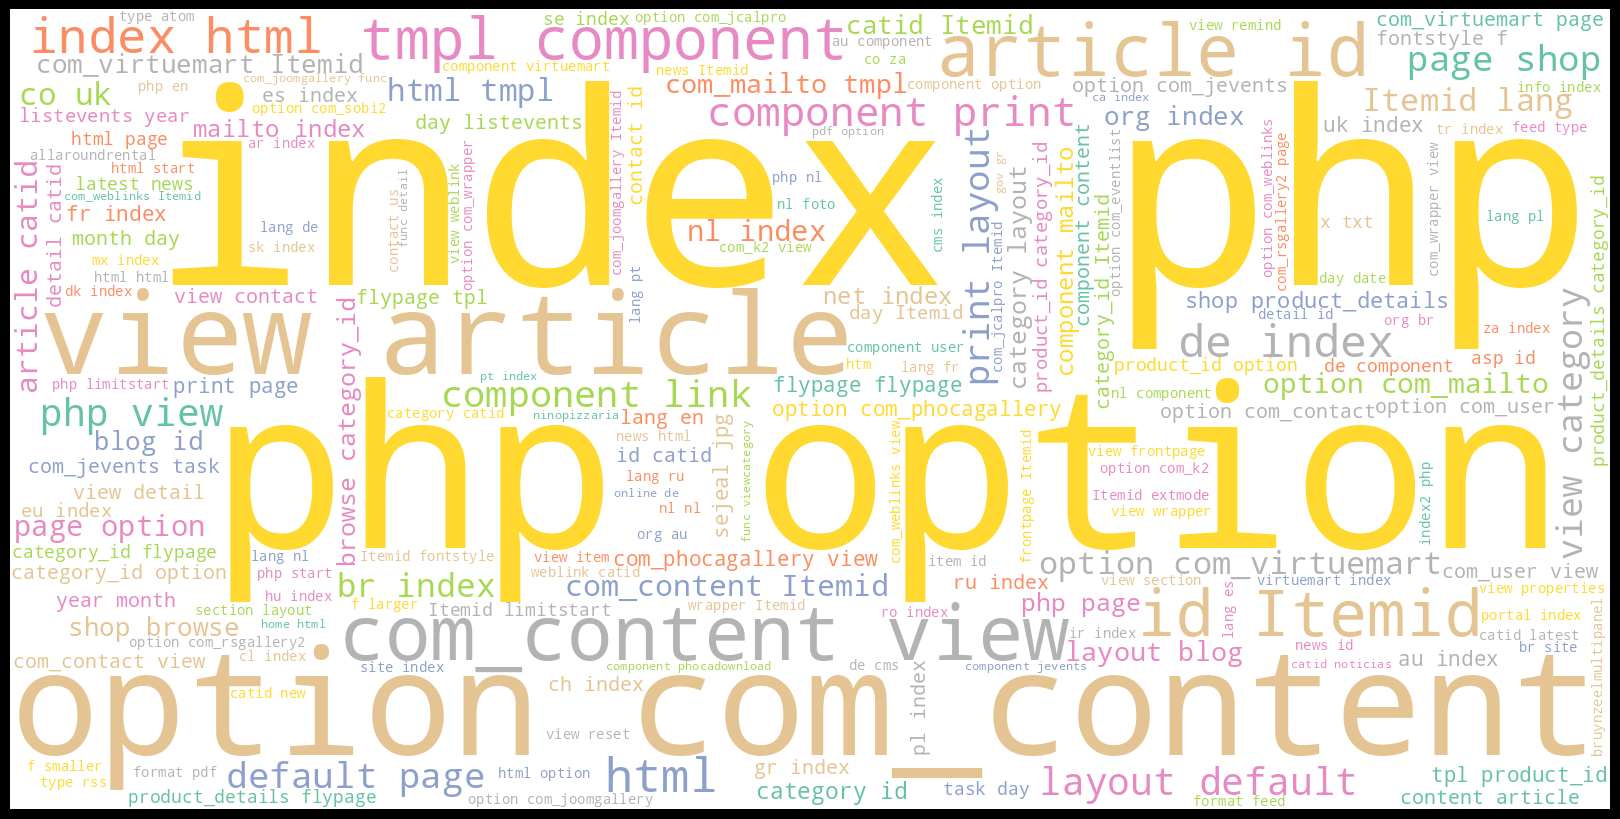

In [13]:
deface_url = " ".join(i for i in df_deface.url)

wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color="white",  
    colormap="Set2", 
    
).generate(deface_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# plt.savefig('./Images/deface_wordcloud.png')

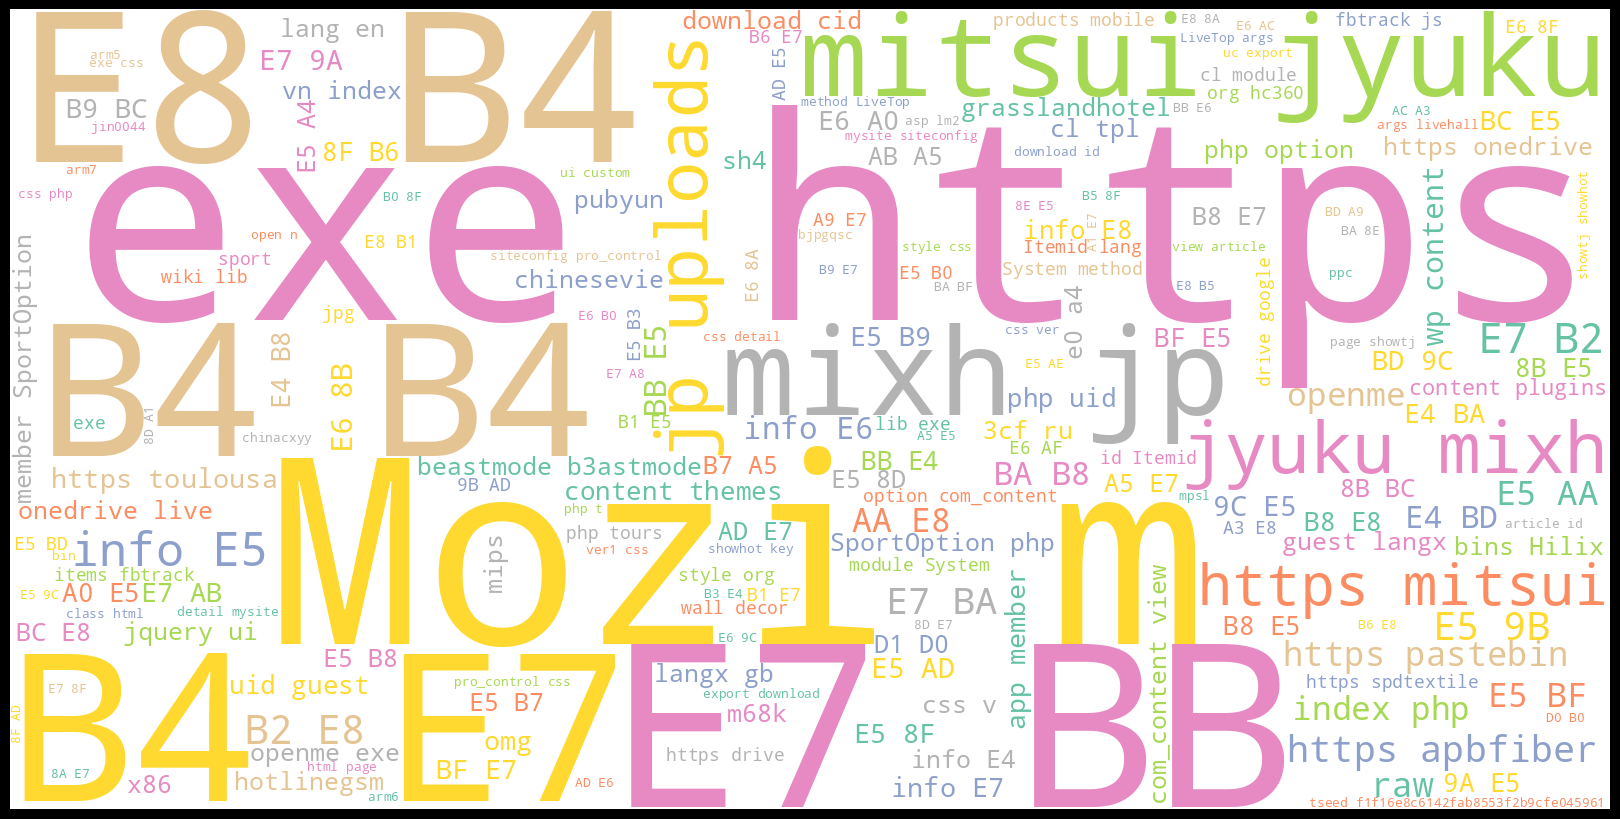

In [14]:
malware_url = " ".join(i for i in df_malware.url)

wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color="white",  
    colormap="Set2", 
    
).generate(malware_url)


plt.figure( figsize=(16,18),facecolor='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
# plt.savefig('./Images/malware_wordcloud.png')

# Feature Engineering

#### In this step, we will extract the following lexical features from raw URLs, as these features will be used as the input features for training the machine learning model. The following features are created as follows:

### having_ip_address: 
Generally cyber attackers use an IP address in place of the domain name to hide the identity of the website. this feature will check whether the URL has IP address or not.

In [15]:
import re

#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    
    
    if match:

        return 1
    else:

        return 0

df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [16]:
df['use_of_ip'].value_counts()

use_of_ip
0    643898
1      7293
Name: count, dtype: int64

In [17]:
df[df['use_of_ip'] == 1]

,url,type,use_of_ip
10408,http://219.232.244.89/intl/update/error_login.htm,phishing,1
12441,boards.ancestry.com/topics.ethnic.natam.nation...,benign,1
12853,http://www.controlyourbreath.com/new/css_/img/...,phishing,1
13161,http://www.reqntpvw.com/Public/softs/everythin...,malware,1
14915,http://66.208.115.70/images/index.asp,phishing,1
...,...,...,...
598624,helapharm.ro/css_/img/webscr/cmd_/e2tUc17DNO4H...,benign,1
598638,helapharm.ro/css_/img/webscr/cmd_/e2tUc17DNO4H...,benign,1
601657,www.mairie-saint-avold.fr/admin/125.14.226.143...,benign,1
601697,www.mairie-saint-avold.fr/admin/190.244.107.16...,benign,1


Text(0.5, 1.0, 'Usage of Ip Address in domain name in Diffrent types of attacks')

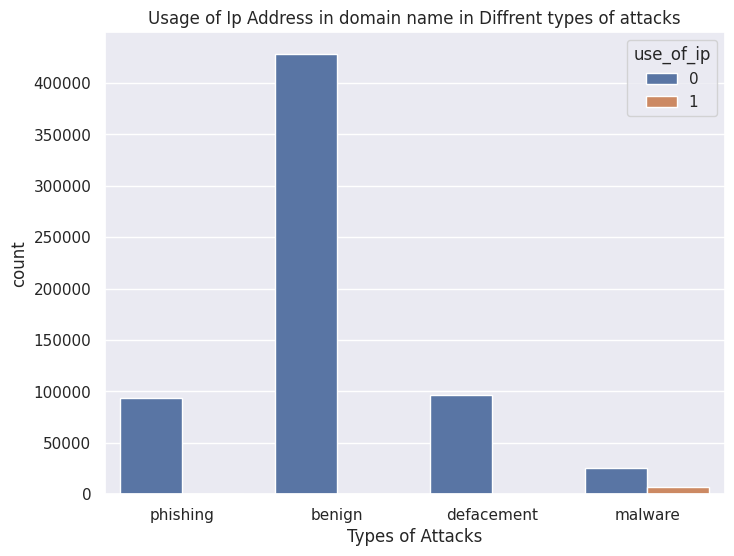

In [18]:

plt.figure(figsize = (8 , 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, hue="use_of_ip")
plt.xlabel('Types of Attacks')
plt.title("Usage of Ip Address in domain name in Diffrent types of attacks")

In [19]:
arr = np.where(df[df['type'] == 'benign']['use_of_ip'] == 1)
arr[0].shape

(89,)

In [20]:
arr = np.where(df[df['type'] == 'malware']['use_of_ip'] == 1)
arr[0].shape

(6870,)

In [21]:
arr = np.where(df[df['type'] == 'phishing']['use_of_ip'] == 1)
arr[0].shape

(334,)

In [22]:
arr = np.where(df[df['type'] == 'defacement']['use_of_ip'] == 1)
arr[0].shape

(0,)

### Abnormal URL

This feature can be extracted from the WHOIS database. For a legitimate website, identity is typically part of its URL.

In [23]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:      
        return 1
    else:
       
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [24]:
df['abnormal_url'].value_counts()

abnormal_url
0    463185
1    188006
Name: count, dtype: int64

Text(0.5, 1.0, 'Usage of Ip Address in domain name in Diffrent types of attacks')

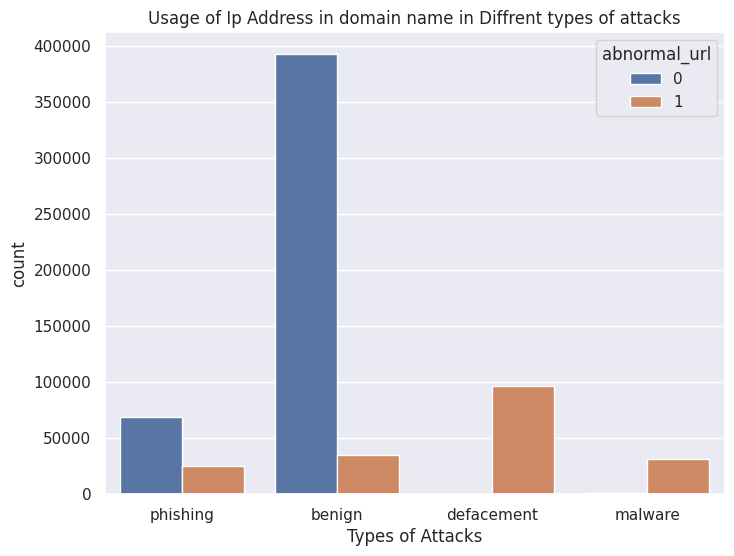

In [25]:
plt.figure(figsize = (8 , 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=df, hue="abnormal_url")
plt.xlabel('Types of Attacks')
plt.title("Usage of Ip Address in domain name in Diffrent types of attacks")

In [26]:
arr = df[df['type'] == 'benign']['abnormal_url'].value_counts()
# arr[0].shape
arr

abnormal_url
0    392709
1     35394
Name: count, dtype: int64

In [27]:
arr = df[df['type'] == 'phishing']['abnormal_url'].value_counts()
# arr[0].shape
arr

abnormal_url
0    69266
1    24845
Name: count, dtype: int64

In [28]:
arr = df[df['type'] == 'defacement']['abnormal_url'].value_counts()
# arr[0].shape
arr

abnormal_url
1    96457
Name: count, dtype: int64

In [29]:
arr = df[df['type'] == 'malware']['abnormal_url'].value_counts()
# arr[0].shape
arr

abnormal_url
1    31310
0     1210
Name: count, dtype: int64

In [32]:
pip install googlesearch-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
from googlesearch import search

### google_index:
In this feature, we check whether the URL is indexed in google search console or not.

In [34]:
def google_index(url):
    
    site = search(url, 5)
    return 1 if site else 0

df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [35]:
print(df['url'][0])
for j in search(df['url'][0], num_results=10):
    print(j)

br-icloud.com.br
https://www.icloud.com/
https://www.apple.com/br/icloud/
https://www.icloud.com.br/
https://www.apple.com/br/icloud/find-my/
https://www.icloud.com.br/iniciar-sessao
https://apps.microsoft.com/detail/9pktq5699m62?hl=pt-BR
https://learn.icloud.apple/pt-br/invites
https://macmagazine.com.br/sobre/icloud-com/
https://doe.cmdca.go.gov.br/Android/20250805/?edu=apple%20icloud%20login
https://www.reddit.com/r/MacOS/comments/1mdchcn/i_cant_login_to_icloudcom_in_safari_on_new_mac/?tl=pt-br


In [36]:
df['google_index'].value_counts()

google_index
1    651191
Name: count, dtype: int64

### Count dot (.) : 
The phishing or malware websites generally use more than two sub-domains in the URL. Each domain is separated by dot (.). If any URL contains more than three dots(.), then it increases the probability of a malicious site.

In [37]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))

In [38]:
df['count.'].value_counts()

count.
2     236038
1     219105
3     129667
4      40227
5       9436
6       5729
7       3570
8       1566
9       1150
10      1114
11       973
12       757
13       505
14       379
15       259
16       144
20       129
17       118
19        88
18        70
0         61
22        24
24        22
21        18
23        10
25         9
36         5
27         4
26         4
35         3
42         3
31         1
37         1
34         1
28         1
Name: count, dtype: int64

Text(0.5, 1.0, 'No. Of Dots Available in URLS ')

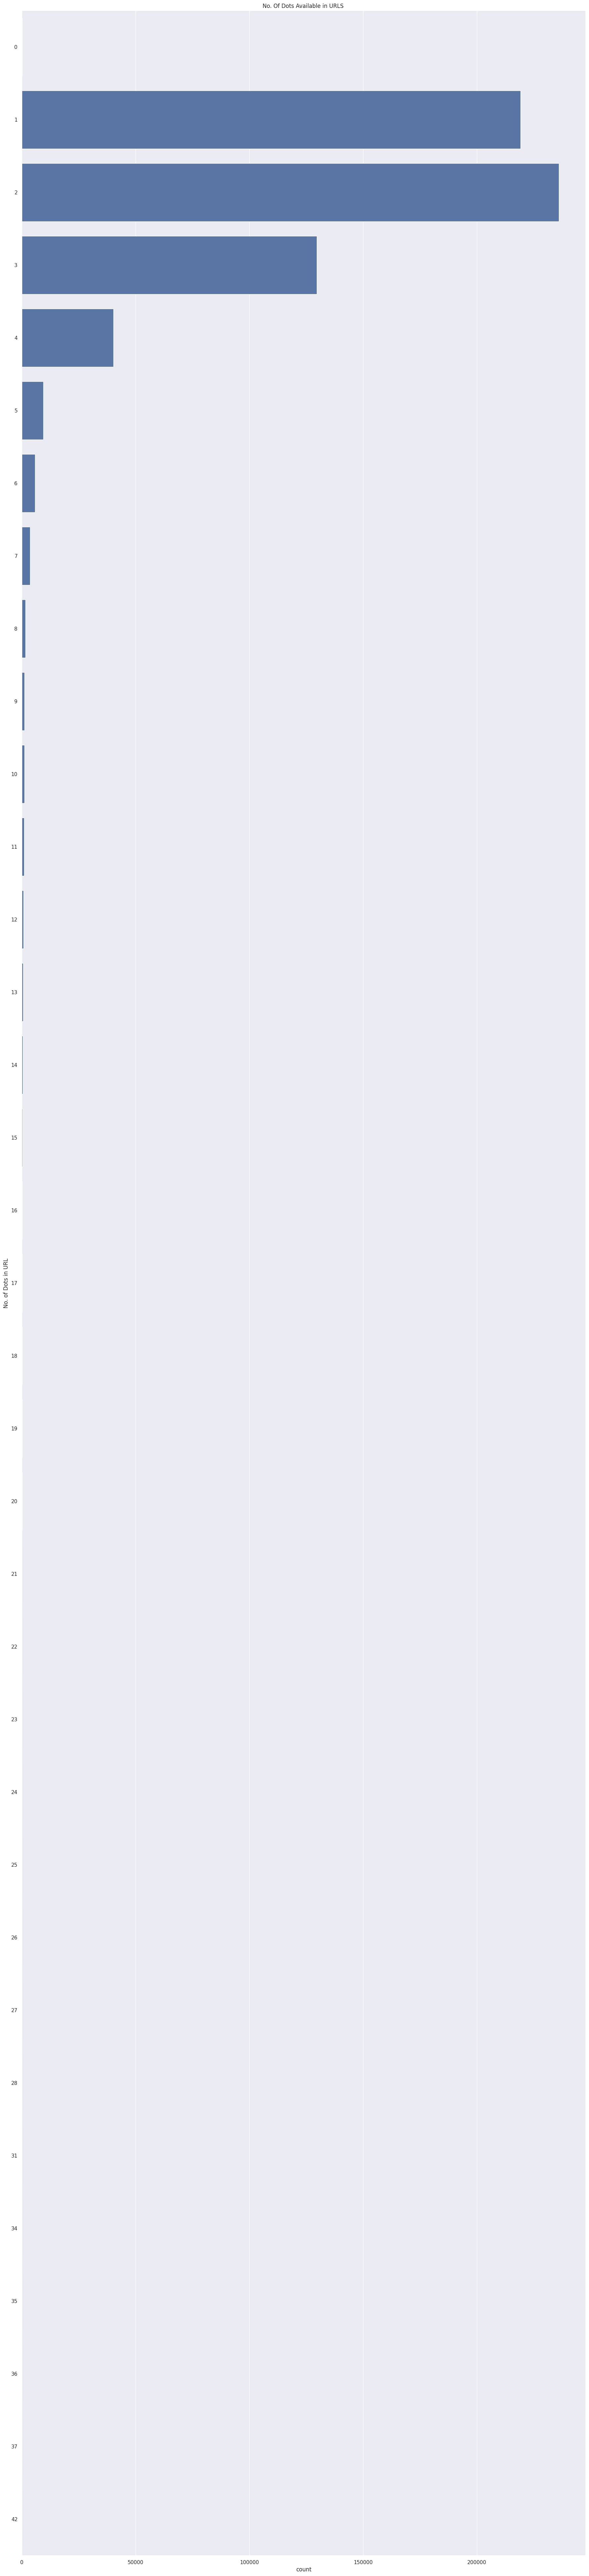

In [39]:
plt.figure(figsize = (22 , 100))
sns.set(style="darkgrid")
ax = sns.countplot(y="count.", data=df)
plt.ylabel('No. of Dots in URL')
plt.title("No. Of Dots Available in URLS ")

### Count-www: 
Generally most of the safe websites have one www in its URL. This feature helps in detecting malicious websites if the URL has no or more than one www in its URL.

In [40]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

In [41]:
df['count-www'].value_counts()

count-www
0    525525
1    124178
2      1422
3        58
4         7
5         1
Name: count, dtype: int64

Text(0.5, 1.0, 'No. Of WWW Available in URLS ')

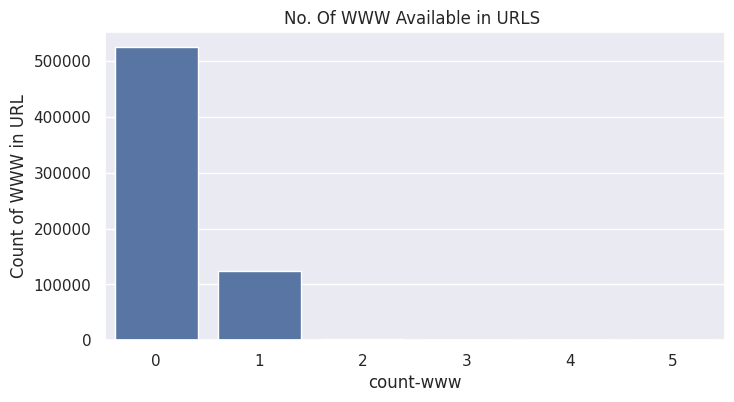

In [42]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count-www", data=df)
plt.ylabel('Count of WWW in URL')
plt.title("No. Of WWW Available in URLS ")

### count@: 
The presence of the “@” symbol in the URL ignores everything previous to it. 

In [43]:
def count_atrate(url):
     
    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))

In [44]:
df['count@'].value_counts()

count@
0     649845
1       1290
2         40
3          9
4          3
10         3
6          1
Name: count, dtype: int64

Text(0.5, 1.0, 'No. Of @ Available in URLS ')

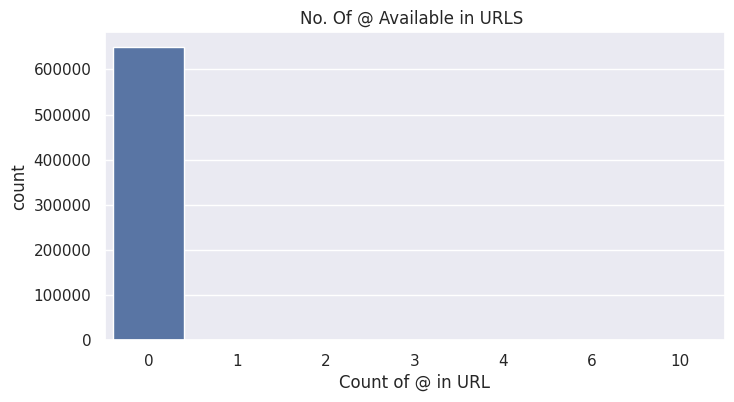

In [45]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count@", data=df)
plt.xlabel('Count of @ in URL')
plt.title("No. Of @ Available in URLS ")

### Count_dir: 
The presence of multiple directories in the URL generally indicates suspicious websites.

In [46]:
def no_of_dir(url):
    urldir = urlparse(url).path
#     print(urldir)
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

In [47]:
print(df['url'][5])
no_of_dir(df['url'][5])

http://buzzfil.net/m/show-art/ils-etaient-loin-de-s-imaginer-que-le-hibou-allait-faire-ceci-quand-ils-filmaient-2.html


3

In [48]:
df['count_dir'].value_counts()

count_dir
1     208263
2     185322
3     120164
4      53510
5      35379
0      23046
6      14204
7       5671
8       2326
10      1362
9        966
11       343
13       176
12       165
14       161
16        50
15        32
22        12
18        10
17         9
21         5
19         3
24         2
23         2
27         2
39         1
28         1
25         1
20         1
32         1
34         1
Name: count, dtype: int64

### Count_embed_domain: 
The number of the embedded domains can be helpful in detecting malicious URLs. It can be done by checking the occurrence of “//” in the URL.


In [49]:
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domain'] = df['url'].apply(lambda i: no_of_embed(i))

In [50]:
def no_of_embed(url):
    urldir = urlparse(url).path
    
    print(urldir)
    return urldir.count('//')

print(df['url'][7])
no_of_embed(df['url'][7])


yourbittorrent.com/?q=anthony-hamilton-soulife
yourbittorrent.com/


0

In [51]:
df['count_embed_domain'].value_counts()

count_embed_domain
0    650205
1       974
2        12
Name: count, dtype: int64

Text(0.5, 1.0, 'No. Of embedded domain Available in URLS ')

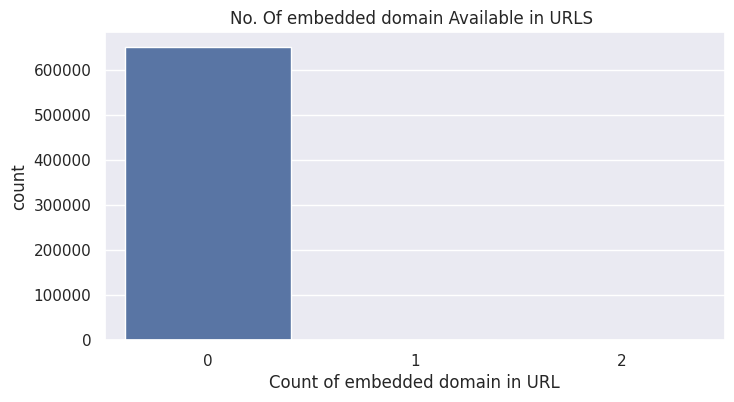

In [52]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count_embed_domain", data=df)
plt.xlabel('Count of embedded domain in URL')
plt.title("No. Of embedded domain Available in URLS ")

### Suspicious words in URL: 
Malicious URLs generally contain suspicious words in the URL such as PayPal, login, sign in, bank, account, update, bonus, service, ebayisapi, token, etc. We have found the presence of such frequently occurring suspicious words in the URL as a binary variable i.e., whether such words present in the URL or not.

In [53]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
    
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))

In [54]:
df['sus_url'].value_counts()

sus_url
0    607818
1     43373
Name: count, dtype: int64

Text(0.5, 1.0, 'No. Of Suspicious Words  Available in URLS ')

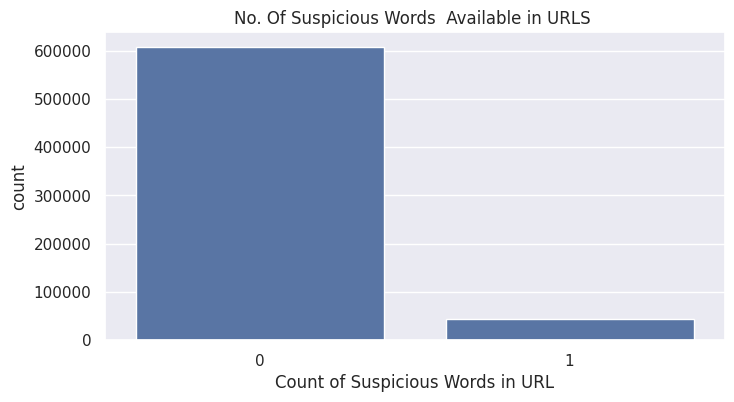

In [55]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="sus_url", data=df)
plt.xlabel('Count of Suspicious Words in URL')
plt.title("No. Of Suspicious Words  Available in URLS ")

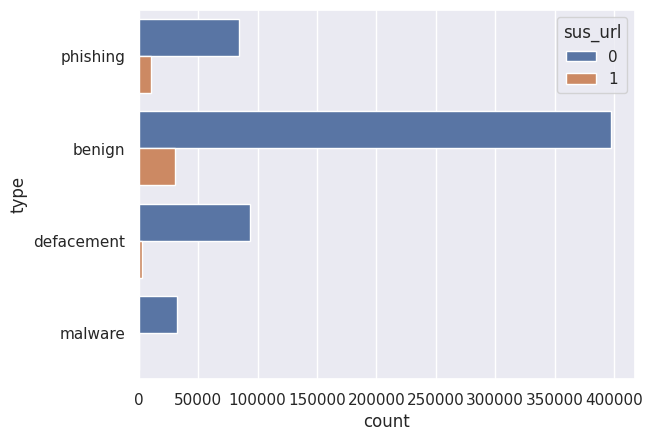

In [56]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="sus_url")

### Short_url: 
This feature is created to identify whether the URL uses URL shortening services like bit. \ly, goo.gl, go2l.ink, etc.

In [57]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

In [58]:
df['short_url'].value_counts()

short_url
0    611436
1     39755
Name: count, dtype: int64

Text(0.5, 1.0, 'Identify whether the URL uses URL shortening services')

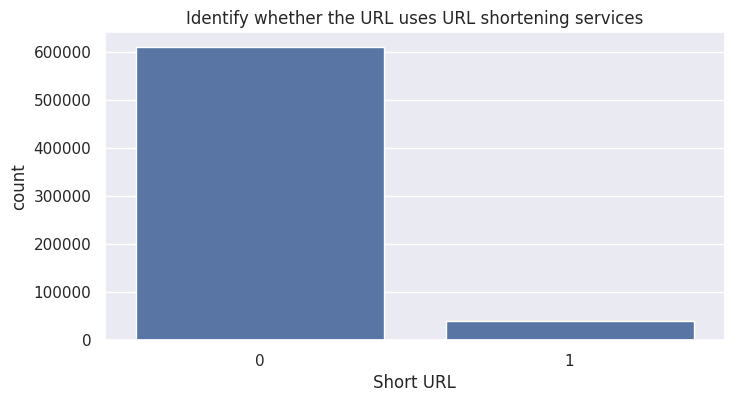

In [59]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="short_url", data=df)
plt.xlabel('Short URL')
plt.title("Identify whether the URL uses URL shortening services")

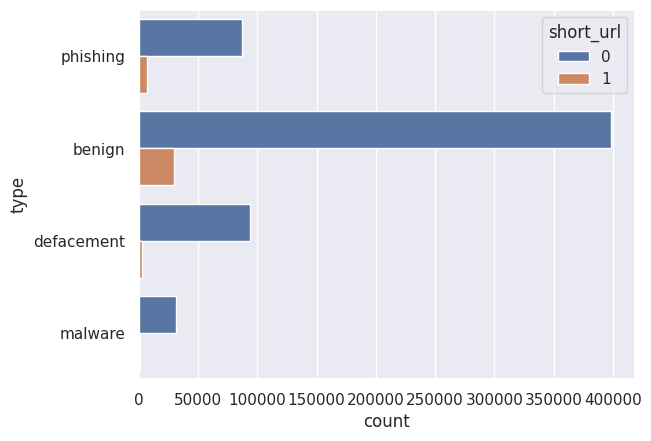

In [60]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="short_url")

In [61]:
df[df['type'] == 'benign']['short_url'].value_counts()

short_url
0    398492
1     29611
Name: count, dtype: int64

In [62]:
df[df['type'] == 'phishing']['short_url'].value_counts()

short_url
0    87275
1     6836
Name: count, dtype: int64

In [63]:
df[df['type'] == 'malware']['short_url'].value_counts()

short_url
0    31813
1      707
Name: count, dtype: int64

In [64]:
df[df['type'] == 'defacement']['short_url'].value_counts()

short_url
0    93856
1     2601
Name: count, dtype: int64

### Count_https: 
Generally malicious URLs do not use HTTPS protocols as it generally requires user credentials and ensures that the website is safe for transactions. So, the presence or absence of HTTPS protocol in the URL is an important feature.

In [65]:
def count_https(url):
    return url.count('https')

df['count_https'] = df['url'].apply(lambda i : count_https(i))


In [66]:
df['count_https'].value_counts()

count_https
0    634768
1     16197
2       183
3        34
5         6
4         3
Name: count, dtype: int64

Text(0.5, 1.0, 'Identify the no. of Https in URLs')

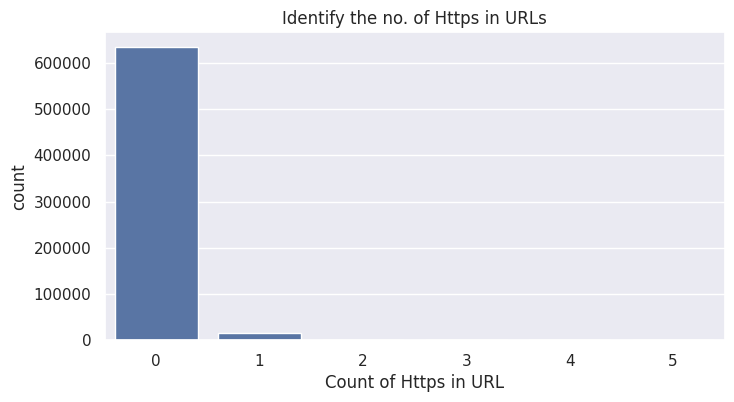

In [67]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count_https", data=df)
plt.xlabel('Count of Https in URL')
plt.title("Identify the no. of Https in URLs")

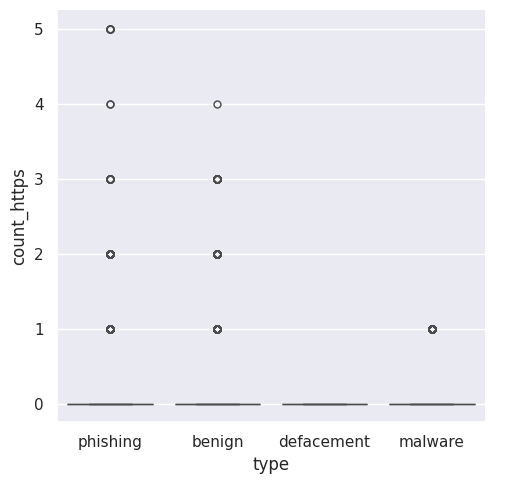

In [68]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count_https", kind="box", data=df)


<Axes: xlabel='count', ylabel='type'>

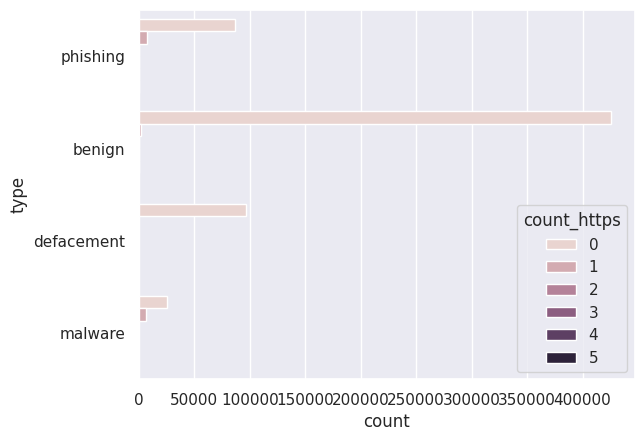

In [69]:
sns.countplot(y = 'type', data = df, hue = 'count_https')

In [70]:
df[df['type'] == 'benign']['count_https'].value_counts()

count_https
0    425707
1      2325
2        47
3        23
4         1
Name: count, dtype: int64

In [71]:
df[df['type'] == 'phishing']['count_https'].value_counts()

count_https
0    86848
1     7108
2      136
3       11
5        6
4        2
Name: count, dtype: int64

In [72]:
df[df['type'] == 'malware']['count_https'].value_counts()

count_https
0    25756
1     6764
Name: count, dtype: int64

In [73]:
df[df['type'] == 'defacement']['count_https'].value_counts()

count_https
0    96457
Name: count, dtype: int64

### Count_http: 
Most of the time, phishing or malicious websites have more than one HTTP in their URL whereas safe sites have only one HTTP.

In [74]:
def count_http(url):
    return url.count('http')

df['count_http'] = df['url'].apply(lambda i : count_http(i))

In [75]:
df['count_http'].value_counts()

count_http
0    461527
1    186625
2      2564
3       455
4        11
9         6
6         2
5         1
Name: count, dtype: int64

Text(0.5, 1.0, 'Identify the no. of Http in URLs')

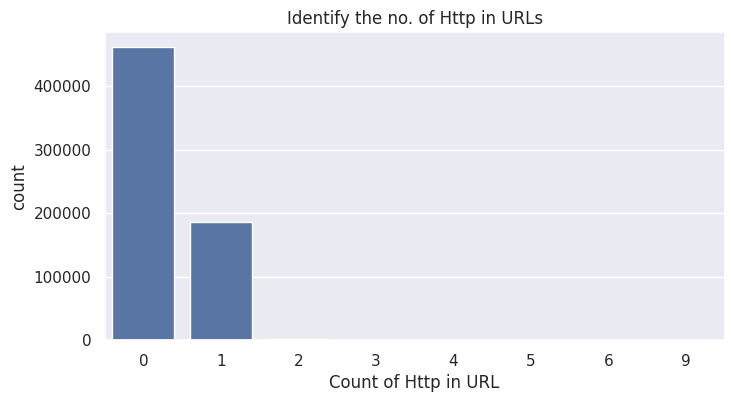

In [76]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count_http", data=df)
plt.xlabel('Count of Http in URL')
plt.title("Identify the no. of Http in URLs")

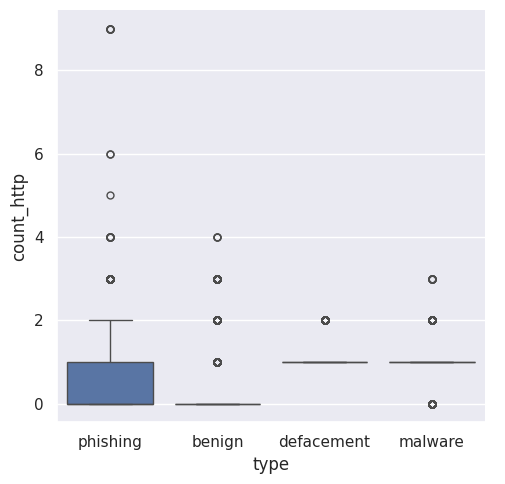

In [77]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count_http", kind="box", data=df)


<Axes: xlabel='count', ylabel='type'>

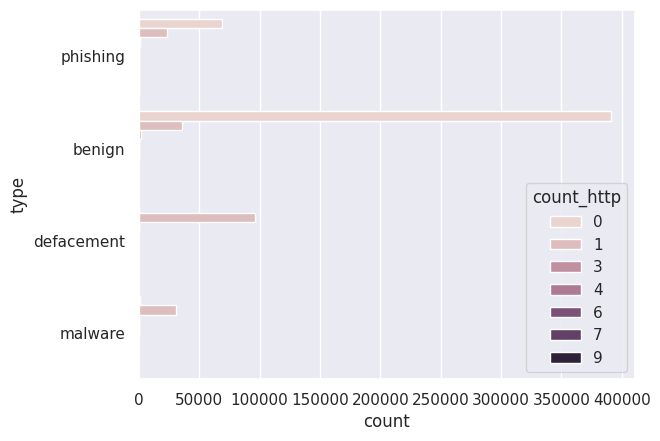

In [78]:
sns.countplot(y = 'type', data = df, hue = 'count_http')

In [79]:
df[df['type'] == 'benign']['count_http'].value_counts()

count_http
0    391104
1     35437
2      1491
3        68
4         3
Name: count, dtype: int64

In [80]:
df[df['type'] == 'phishing']['count_http'].value_counts()

count_http
0    69215
1    23644
2      858
3      377
4        8
9        6
6        2
5        1
Name: count, dtype: int64

In [81]:
df[df['type'] == 'defacement']['count_http'].value_counts()

count_http
1    96382
2       75
Name: count, dtype: int64

In [82]:
df[df['type'] == 'malware']['count_http'].value_counts()

count_http
1    31162
0     1208
2      140
3       10
Name: count, dtype: int64

### Count%: 
As we know URLs cannot contain spaces. URL encoding normally replaces spaces with symbol (%). Safe sites generally contain less number of spaces whereas malicious websites generally contain more spaces in their URL hence more number of %.

In [83]:
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

In [84]:
df['count%'].value_counts()

count%
0      623991
1        5824
2        4981
3        2415
6        1710
        ...  
146         1
231         1
198         1
128         1
149         1
Name: count, Length: 124, dtype: int64

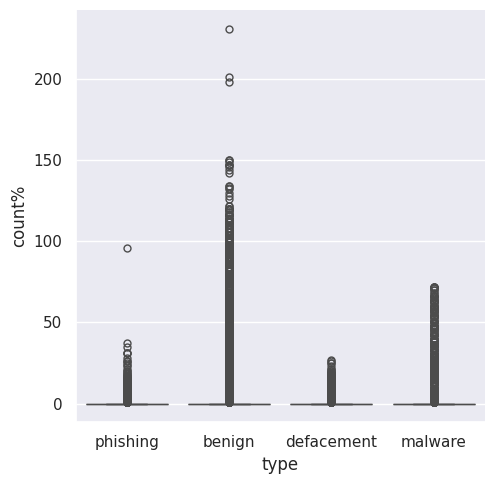

In [85]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count%", kind="box", data=df)

### Count?: 
The presence of symbol (?) in URL denotes a query string that contains the data to be passed to the server. More number of ? in URL definitely indicates suspicious URL.


In [86]:
def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

In [87]:
df['count?'].value_counts()

count?
0     511013
1     134983
2       5065
3         69
4         25
5         11
7          7
6          3
11         3
8          3
12         2
13         2
14         1
15         1
20         1
10         1
17         1
Name: count, dtype: int64

Text(0.5, 1.0, 'Identify the no. of (?) in URLs')

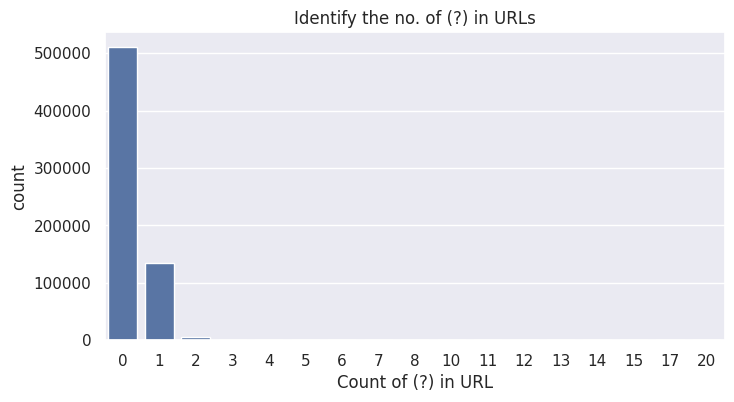

In [88]:
plt.figure(figsize = (8 , 4))
sns.set(style="darkgrid")
ax = sns.countplot(x="count?", data=df)
plt.xlabel('Count of (?) in URL')
plt.title("Identify the no. of (?) in URLs")

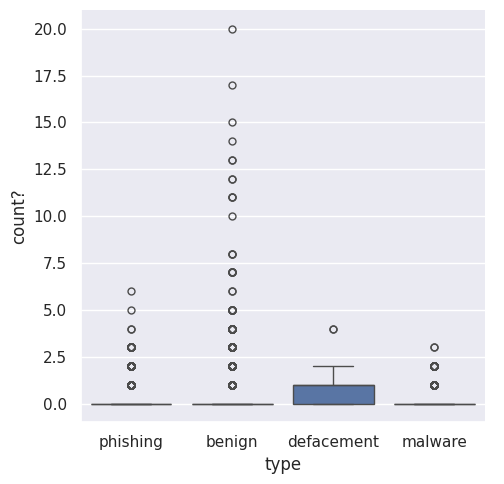

In [89]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count?", kind="box", data=df)

### Count-: 
Phishers or cybercriminals generally add dashes(-) in prefix or suffix of the brand name so that it looks genuine URL. For example. www.flipkart-india.com. 

In [90]:
def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

In [91]:
df['count-'].value_counts()

count-
0     377210
1     104187
2      44061
3      27016
4      22128
5      16145
6      12277
7       9347
8       8400
9       6775
10      6050
11      4710
12      3567
13      2769
14      1990
15      1414
16       924
17       694
18       411
19       269
20       186
21       151
22       100
23        88
24        61
25        42
26        35
27        34
28        32
29        26
31        16
30        12
34         9
32         9
35         5
38         5
33         5
47         4
36         4
41         4
40         3
37         3
42         3
39         3
64         3
50         1
48         1
87         1
54         1
Name: count, dtype: int64

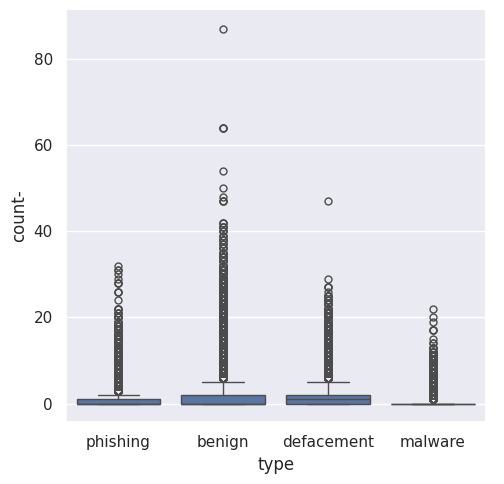

In [92]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count-", kind="box", data=df)

### Count=: 
Presence of equal to (=) in URL indicates passing of variable values from one form page to another. It is considered as riskier in URL as anyone can change the values to modify the page.

In [94]:
def count_equal(url):
    return url.count('=')

df['count='] = df['url'].apply(lambda i: count_equal(i))

In [95]:
df['count='].value_counts()

count=
0     510898
1      54747
2      23212
4      21442
3      14951
5      13443
6       5685
9       2391
7       1981
8       1340
10       344
11       212
12       163
19       127
13       118
14        68
15        19
16        10
17         9
18         7
22         7
34         4
24         4
28         3
20         1
21         1
39         1
29         1
51         1
26         1
Name: count, dtype: int64

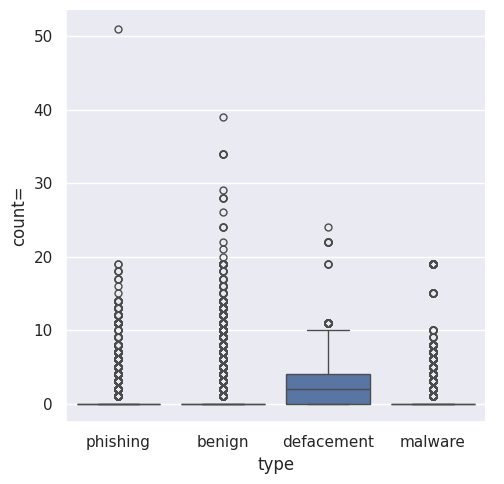

In [96]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count=", kind="box", data=df)

### url_length: 
Attackers generally use long URLs to hide the domain name. We found the average length of a safe URL is 74.

In [97]:
def url_length(url):
    return len(str(url))

df['url_length'] = df['url'].apply(lambda i: url_length(i))

In [98]:
df['url_length'].value_counts()

url_length
31      19023
33      14209
34      12243
27      11967
35      11700
        ...  
2175        1
493         1
586         1
463         1
467         1
Name: count, Length: 549, dtype: int64

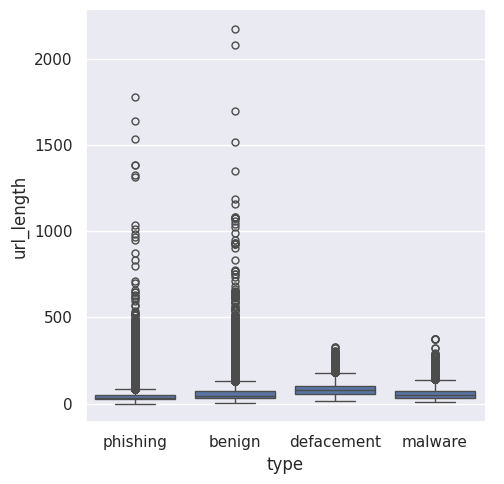

In [99]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="url_length", kind="box", data=df)

### hostname_length:
The length of the hostname is also an important feature for detecting malicious URLs.

In [100]:
def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

In [101]:
df['hostname_length'].value_counts()

hostname_length
0      463192
15      15950
13      14592
14      14061
20      12039
        ...  
116         1
83          1
100         1
122         1
179         1
Name: count, Length: 134, dtype: int64

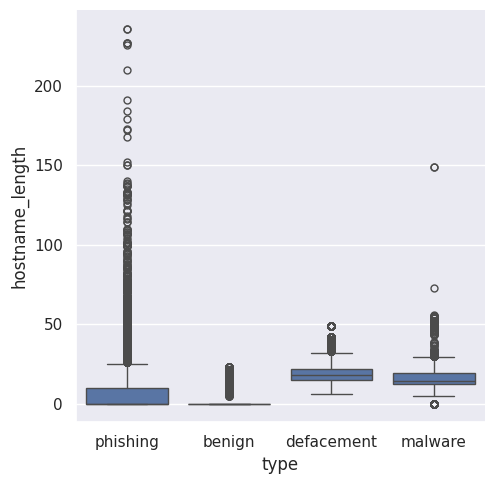

In [102]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="hostname_length", kind="box", data=df)

### First directory length: 
This feature helps in determining the length of the first directory in the URL. So looking for the first ‘/’ and counting the length of the URL up to this point helps in finding the first directory length of the URL. For accessing directory level information we need to install python library TLD. You can check this link for installing TLD.

In [103]:
pip install tld

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 KB 433.2 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [104]:
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

In [105]:
df['fd_length'].value_counts()

fd_length
9      83387
4      80768
0      77782
6      51283
5      50371
       ...  
241        1
206        1
199        1
154        1
230        1
Name: count, Length: 218, dtype: int64

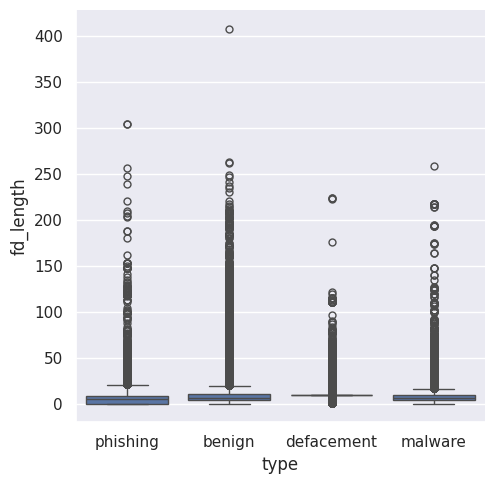

In [106]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="fd_length", kind="box", data=df)

### Length of top-level domains: 
A top-level domain (TLD) is one of the domains at the highest level in the hierarchical Domain Name System of the Internet. For example, in the domain name www.example.com, the top-level domain is com. So, the length of TLD is also important in identifying malicious URLs. As most of the URLs have .com extension. TLDs in the range from 2 to 3 generally indicate safe URLs.

In [107]:
#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [108]:
df['tld']

0         None
1         None
2         None
3           be
4          net
          ... 
651186    None
651187    None
651188    None
651189    None
651190    None
Name: tld, Length: 651191, dtype: object

In [109]:
df['tld'].value_counts()

tld
com            71689
de             11331
net             9852
nl              6159
com.br          5934
               ...  
gov.pk             1
llc                1
eurodir.ru         1
stargard.pl        1
ht                 1
Name: count, Length: 543, dtype: int64

In [110]:
df['tld_length'].value_counts()

tld_length
-1     475281
 3      87462
 2      58688
 6      16612
 5       6214
 4       5405
 12       458
 14       297
 7        254
 9        130
 11       101
 16        71
 8         50
 13        42
 15        41
 10        30
 21        18
 17         9
 26         8
 20         3
 27         3
 30         3
 18         2
 25         2
 22         2
 31         2
 39         2
 34         1
Name: count, dtype: int64

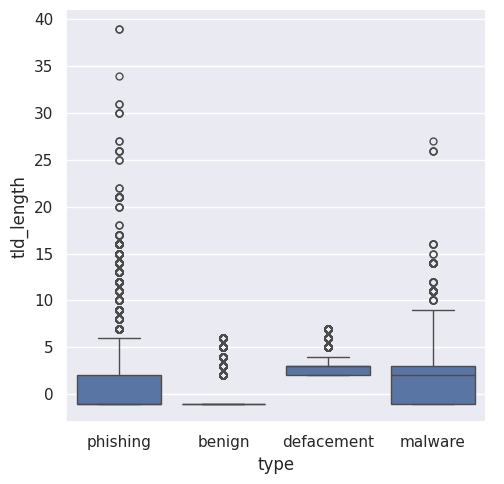

In [111]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="tld_length", kind="box", data=df)

In [112]:
df.drop(["tld"], axis = 1, inplace = True)

### Count_digits: 
The presence of digits in URL generally indicate suspicious URLs. Safe URLs generally do not have digits so counting the number of digits in URL is an important feature for detecting malicious URLs.

In [113]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits += 1
    return digits


df['count_digits']= df['url'].apply(lambda i: digit_count(i))

In [114]:
df['count_digits'].value_counts()

count_digits
0      277500
4       41826
2       36989
1       35880
6       34093
        ...  
206         1
286         1
229         1
194         1
151         1
Name: count, Length: 222, dtype: int64

In [115]:
df['count_digits'].describe()

count    651191.000000
mean          5.527409
std          11.700814
min           0.000000
25%           0.000000
50%           2.000000
75%           7.000000
max        1204.000000
Name: count_digits, dtype: float64

### Count_letters: 
The number of letters in the URL also plays a significant role in identifying malicious URLs. As attackers try to increase the length of the URL to hide the domain name and this is generally done by increasing the number of letters and digits in the URL. 

In [116]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters += 1
    return letters


df['count_letters']= df['url'].apply(lambda i: letter_count(i))


In [117]:
df['count_letters'].value_counts()

count_letters
26     16704
25     16617
27     15503
24     15142
28     15054
       ...  
364        1
772        1
480        1
485        1
343        1
Name: count, Length: 425, dtype: int64

In [118]:
df['count_letters'].describe()

count    651191.000000
mean         45.247104
std          31.624502
min           0.000000
25%          25.000000
50%          37.000000
75%          58.000000
max        2141.000000
Name: count_letters, dtype: float64

In [119]:
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domain,...,count%,count?,count-,count=,url_length,hostname_length,fd_length,tld_length,count_digits,count_letters
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,0,1,0,16,0,0,-1,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,35,0,5,-1,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,0,0,31,0,7,-1,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,0,1,1,4,88,21,9,2,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,0,1,1,3,235,23,9,3,22,199


In [120]:
df.to_csv("preprocessed_data.csv")

In [121]:
df = pd.read_csv("preprocessed_data.csv")

# Label Encoding

In [122]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['type_code'] = label_encoder.fit_transform(df['type'])
df['type_code'].value_counts()

type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [123]:
df.columns

Index(['Unnamed: 0', 'url', 'type', 'use_of_ip', 'abnormal_url',
       'google_index', 'count.', 'count-www', 'count@', 'count_dir',
       'count_embed_domain', 'sus_url', 'short_url', 'count_https',
       'count_http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'fd_length', 'tld_length', 'count_digits',
       'count_letters', 'type_code'],
      dtype='object')

# Creation of Feature & Target

In [124]:
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domain', 'short_url', 'count%', 'count?', 'count-', 'count=', 'url_length', 'count_https',
       'count_http', 'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count_digits',
       'count_letters']]

In [125]:
Y = df['type_code']

In [126]:
X.shape

(651191, 21)

In [127]:
Y.shape

(651191,)

# Split the Dataset

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2 , shuffle = True, random_state = 42)

In [130]:
X_train.shape , Y_train.shape

((520952, 21), (520952,))

In [131]:
X_test.shape , Y_test.shape

((130239, 21), (130239,))

In [132]:
X_train

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domain,short_url,count%,count?,...,count=,url_length,count_https,count_http,hostname_length,sus_url,fd_length,tld_length,count_digits,count_letters
461072,0,0,2,0,0,2,0,0,0,0,...,0,40,0,0,0,0,4,-1,0,34
621879,0,0,2,0,0,2,0,0,0,0,...,0,26,0,0,0,0,4,-1,3,19
376801,0,0,2,0,0,2,0,0,0,0,...,0,30,0,0,0,0,4,-1,0,26
560108,0,0,1,0,0,4,0,0,0,0,...,0,42,0,0,0,0,11,-1,0,36
454327,0,0,2,0,0,1,0,0,0,0,...,0,25,0,0,0,0,7,-1,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644167,0,0,3,1,0,1,0,1,0,0,...,0,32,0,0,0,0,16,-1,0,27
259178,0,0,1,0,0,0,0,0,0,0,...,0,15,0,0,0,0,0,-1,3,11
365838,0,1,3,1,0,1,0,0,0,1,...,5,98,0,1,17,0,9,2,11,67
131932,0,0,2,0,0,3,0,0,0,0,...,0,53,0,0,0,0,11,-1,7,39


In [133]:
X_train.values

array([[ 0,  0,  2, ..., -1,  0, 34],
       [ 0,  0,  2, ..., -1,  3, 19],
       [ 0,  0,  2, ..., -1,  0, 26],
       ...,
       [ 0,  1,  3, ...,  2, 11, 67],
       [ 0,  0,  2, ..., -1,  7, 39],
       [ 0,  0,  2, ..., -1,  0, 35]])

In [134]:
X.shape

(651191, 21)

In [135]:
Y.shape

(651191,)

In [136]:
X_train.shape

(520952, 21)

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler = StandardScaler()

In [139]:
print(scaler.fit(X))

StandardScaler()


In [140]:
X = scaler.transform(X)

# Model Building

## Classification report Fuction

In [141]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support, classification_report

def result(y_pred , y_test):
    accuracy = accuracy_score(y_test, y_pred) * 100
#     print(accuracy)
    
    precision , recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    
    res = {
        "Accuracy": accuracy,
        "Precision" : precision,
        "Recall" : recall,
        "F1-Score" : f1_score,
        "Support" : support
    }
    
    print(classification_report(y_test, y_pred ,target_names=['benign', 'defacement','phishing','malware']))
    
    
    
    return res
    

In [142]:
from sklearn.metrics import confusion_matrix

def create_confusion_metric(y_pred , y_test):
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                     index = ['benign', 'defacement','phishing','malware'], 
                     columns = ['benign', 'defacement','phishing','malware'])
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_df, annot=True,fmt=".1f")
    plt.title('Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    
    plt.show()
    

In [143]:
pip install termcolor

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Model Pipeline

In [145]:
!pip install catboost


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 2.5 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 KB 3.6 MB/s eta 0:00:00


In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
# print(colored('Hello', 'red', attrs=['bold']))


# Define classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "CatBoost": CatBoostClassifier(verbose=False),
    "AdaBoost": AdaBoostClassifier()
}


Training Logistic Regression...


/home/rizi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


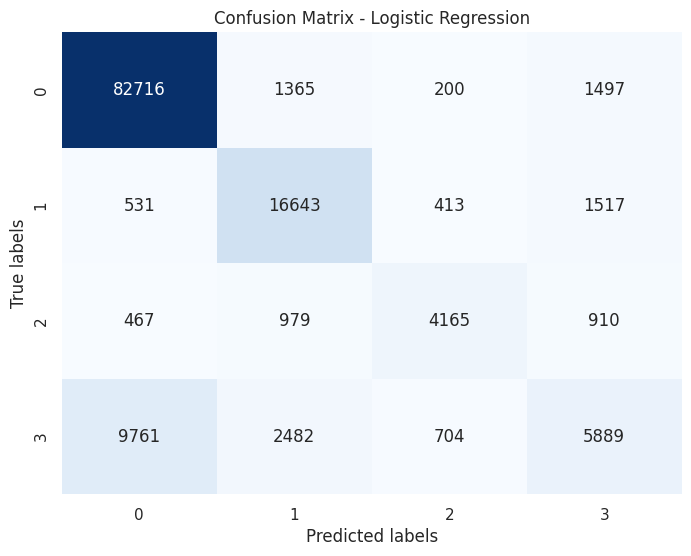


Logistic Regression classifier: Training Results
Training accuracy: 0.8405208157373424
Training precision: 0.8217525977053222
Training recall: 0.8405208157373424
Training F1 score: 0.822650704831202

Logistic Regression classifier: Testing Results
Testing accuracy: 0.8400939811
Testing Precision: 0.8213580165
Testing Recall: 0.8400939811
Testing F1 score: 0.8223833197

Training Decision Tree...


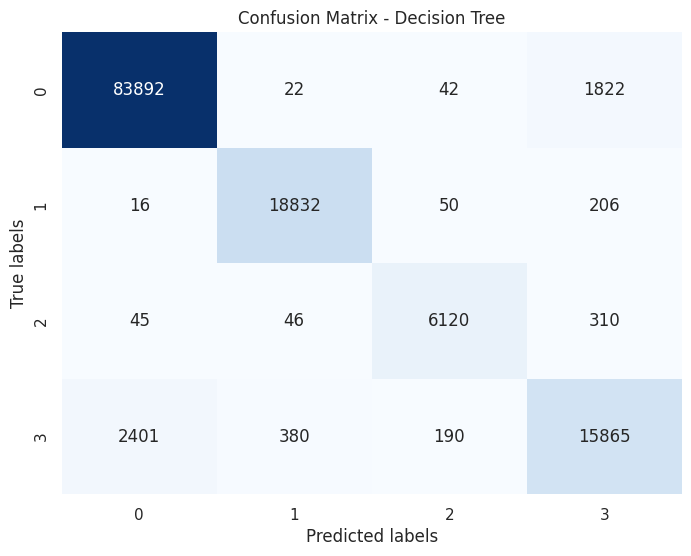


Decision Tree classifier: Training Results
Training accuracy: 0.9861561141909427
Training precision: 0.9860806372874145
Training recall: 0.9861561141909427
Training F1 score: 0.9860523050155541

Decision Tree classifier: Testing Results
Testing accuracy: 0.9575396003
Testing Precision: 0.9570325874
Testing Recall: 0.9575396003
Testing F1 score: 0.9572356603

Training Random Forest...


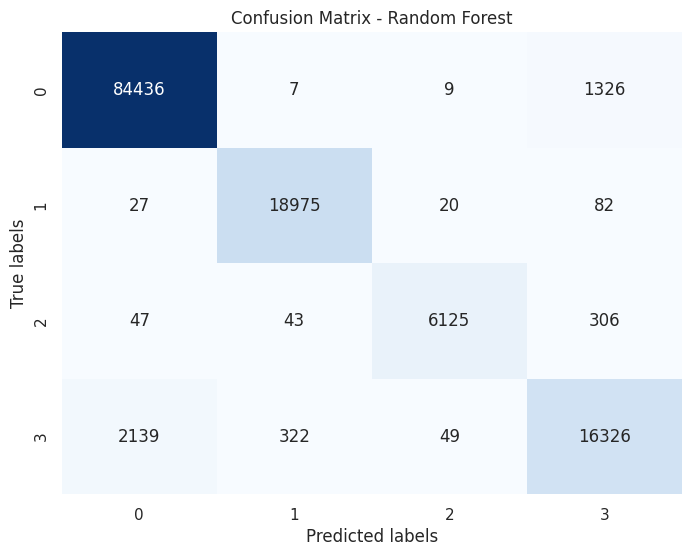


Random Forest classifier: Training Results
Training accuracy: 0.9861541946282959
Training precision: 0.9860873534186575
Training recall: 0.9861541946282959
Training F1 score: 0.9860902369155684

Random Forest classifier: Testing Results
Testing accuracy: 0.9663925552
Testing Precision: 0.9659878378
Testing Recall: 0.9663925552
Testing F1 score: 0.9660781296

Training Gradient Boosting...


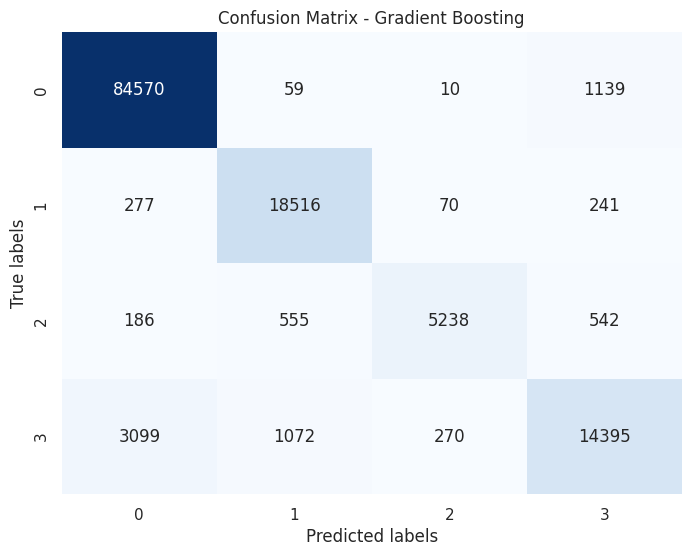


Gradient Boosting classifier: Training Results
Training accuracy: 0.9419812189990633
Training precision: 0.9406128570791122
Training recall: 0.9419812189990633
Training F1 score: 0.9401778013346718

Gradient Boosting classifier: Testing Results
Testing accuracy: 0.9422599989
Testing Precision: 0.9409671662
Testing Recall: 0.9422599989
Testing F1 score: 0.9405182205

Training XGBoost...


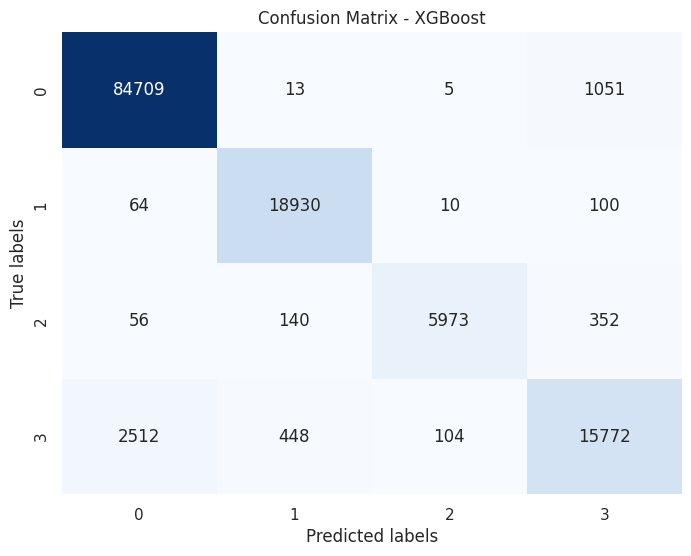


XGBoost classifier: Training Results
Training accuracy: 0.9640235568728021
Training precision: 0.9634181605428934
Training recall: 0.9640235568728021
Training F1 score: 0.9633508019897159

XGBoost classifier: Testing Results
Testing accuracy: 0.9627223796
Testing Precision: 0.9620777671
Testing Recall: 0.9627223796
Testing F1 score: 0.9620385290

Training CatBoost...


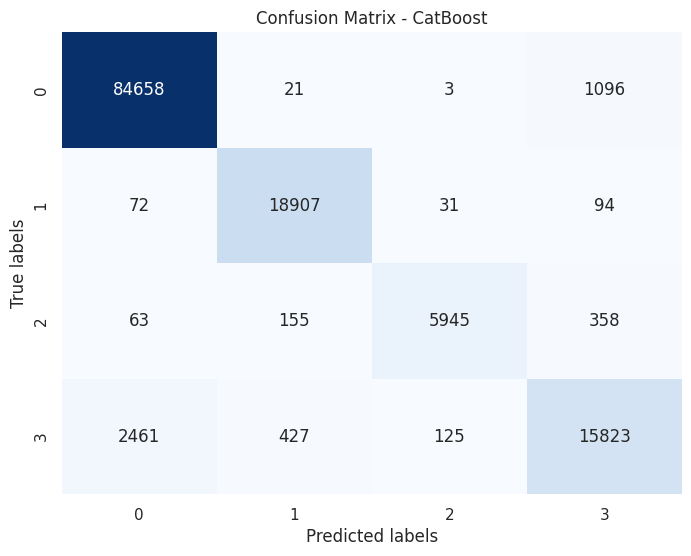


CatBoost classifier: Training Results
Training accuracy: 0.9635820574640274
Training precision: 0.9629707240622184
Training recall: 0.9635820574640274
Training F1 score: 0.962931466020458

CatBoost classifier: Testing Results
Testing accuracy: 0.9623307919
Testing Precision: 0.9616785165
Testing Recall: 0.9623307919
Testing F1 score: 0.9616830853

Training AdaBoost...


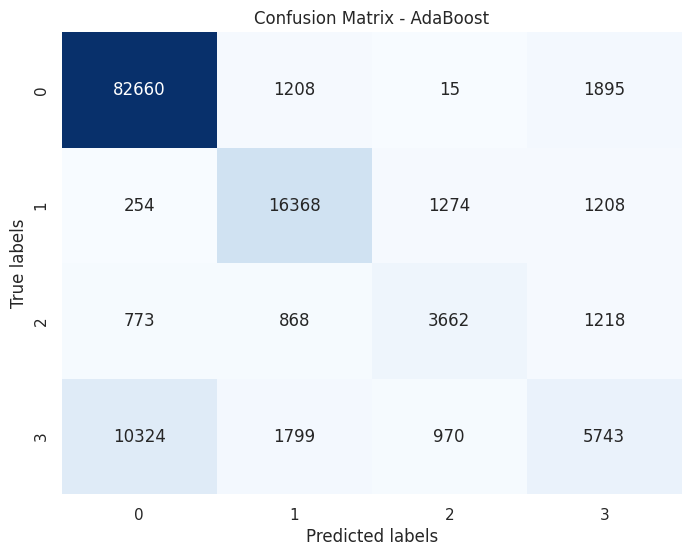


AdaBoost classifier: Training Results
Training accuracy: 0.831594849429506
Training precision: 0.8094054523761833
Training recall: 0.831594849429506
Training F1 score: 0.8130283814220117

AdaBoost classifier: Testing Results
Testing accuracy: 0.8325693533
Testing Precision: 0.8112002036
Testing Recall: 0.8325693533
Testing F1 score: 0.8146080463



In [147]:

# Train and evaluate each model
for model_name, model in models.items():
    print(colored(f"Training {model_name}...", 'red', attrs=['bold']))
#     print(f"Training {model_name}...")
    
    # Fit model to training data
    model.fit(X_train, Y_train)
    
    # Make predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate performance metrics for Train Data
    train_accuracy = accuracy_score(Y_train, y_train_pred)
    train_precision = precision_score(Y_train, y_train_pred, average='weighted')
    train_recall = recall_score(Y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(Y_train, y_train_pred, average='weighted')
#     train_roc_auc = roc_auc_score(Y_train, model.predict_proba(X_train), multi_class='ovr')
    
    
    # Calculate performance metrics for Test Data
    accuracy = accuracy_score(Y_test, y_test_pred)
    precision = precision_score(Y_test, y_test_pred, average='weighted')
    recall = recall_score(Y_test, y_test_pred, average='weighted')
    f1 = f1_score(Y_test, y_test_pred, average='weighted')
#     test_roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test), multi_class='ovr')
    
    # Generate confusion matrix
    cm = confusion_matrix(Y_test, y_test_pred)
    plt.figure(figsize=(8,6))
#     sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Generate ROC-AUC curve
#     fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test), multi_class='ovr')
#     plt.figure(figsize=(8,6))
#     plt.plot(fpr, tpr, label=f'ROC-AUC Curve (Area = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], linestyle='--')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'ROC-AUC Curve - {model_name}')
#     plt.legend()
#     plt.show()
    print(""*5)
    # Print results Train Data
#     print(f"{model_name} classifier: Training Results")
    print(colored(f"{model_name} classifier: Training Results", 'green', attrs=['bold']))
    print("Training accuracy:", train_accuracy)
    print("Training precision:", train_precision)
    print("Training recall:", train_recall)
    print("Training F1 score:", train_f1)
    print("="*50)
    print(""*5)
    
    # Print results Test Data
#     print(f"{model_name} classifier: Testing Results")
    print(colored(f"{model_name} classifier: Testing Results", 'green', attrs=['bold']))
    print(f"Testing accuracy: {accuracy:.10f}")
    print(f"Testing Precision: {precision:.10f}")
    print(f"Testing Recall: {recall:.10f}")
    print(f"Testing F1 score: {f1:.10f}")
    print("="*50)
    print(""*5)